In [1]:
import pandas as pd

In [55]:
df = pd.read_csv('hotel_features.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hotel_names    886 non-null    object
 1   prices         354 non-null    object
 2   total_reviews  886 non-null    object
 3   url            691 non-null    object
 4   ratings        805 non-null    object
dtypes: object(5)
memory usage: 34.7+ KB


In [11]:
# remove duplicants
len(df)


886

In [53]:
# sort values
df.sort_values('hotel_names', inplace = True)

In [54]:
df.nunique()

hotel_names       810
prices            224
total_reviews     512
url               612
ratings            10
number_reviews    512
prices_int        187
ratings_int        10
dtype: int64

In [6]:
# extractiing duplicates hotels
non_duplicates = ~df['hotel_names'].duplicated()

In [7]:
df = df[non_duplicates]

In [5]:
# data claning
# look for duplicates 
# look for null
# replace the null with the mean
# look for outlayers
# optimatization de la memoria

In [ ]:
# Cleaning Prices Feature

In [8]:
# remove $
# remove \n
# conver to number

In [8]:
# def convert_str_int(s):
#     return int(s.replace(",","").split(' ')[0])


In [9]:
# df['number_reviews'] = df['total_reviews'].apply(convert_str_int)

In [17]:
df['number_reviews'] = df['total_reviews'].apply(lambda x : int(x.replace(',' , '').split(' ')[0]))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 74 to 716
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hotel_names     810 non-null    object
 1   prices          301 non-null    object
 2   total_reviews   810 non-null    object
 3   url             616 non-null    object
 4   ratings         729 non-null    object
 5   number_reviews  810 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 44.3+ KB


In [26]:

# df["try_prices"] = df.prices.str.split()
# df.explode("try_prices").reset_index(drop=True)
# df["try_prices"].iloc[200:250]

In [19]:
df.fillna('0' , inplace = True)

In [20]:
df['prices_int'] = df['prices'].apply(lambda x : int(x.replace("$","").split('\n')[0].replace(',',"")))

In [27]:
# Replace zero values for the mean in prices feature
mean_prices_int = df['prices_int'].mean(skipna=True)
df['prices_int']=df.prices_int.mask(df.prices_int == 0,mean_prices_int)


## Ratings

In [44]:
df['ratings_int'] = df['ratings'].apply(lambda x : float(x.split()[0]))

In [49]:
df['ratings_int'].value_counts().sort_index(ascending=False)


5.0     42
4.5    221
4.0    227
3.5    106
3.0     54
2.5     34
2.0     23
1.5      7
1.0     15
0.0     81
Name: ratings_int, dtype: int64

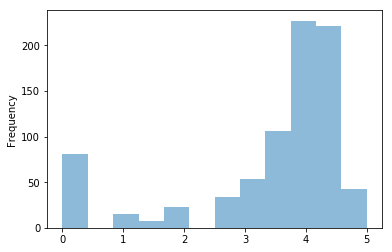

In [52]:
df['ratings_int'].plot.hist(bins=12, alpha=0.5)